In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn import metrics
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import confusion_matrix
import pickle

In [5]:
with open(f"./datasets/X_samples.pickle", "rb") as f:
    X_samples = pickle.load(f)
    
with open(f"./datasets/y_samples.pickle", "rb") as f:
    y_samples = pickle.load(f)
    
with open(f"./datasets/X_test.pickle", "rb") as f:
    X_test = pickle.load(f)
    
with open(f"./datasets/y_test.pickle", "rb") as f:
    y_test = pickle.load(f)

In [6]:
# ['Raw', 'SMOTE', 'ADASYN', 'CNN', 'SMOTE + ENN', 'ADASYN + ENN']

In [7]:
print(X_samples.keys())

dict_keys(['Raw', 'SMOTE', 'ADASYN', 'CNN', 'Tomek Links', 'SMOTE + ENN', 'SMOTE + Tomek', 'ADASYN + ENN', 'SVMSMOTE + ENN'])


In [8]:
data_list = ['Raw', 'SMOTE', 'ADASYN', 'CNN', 'SMOTE + ENN', 'ADASYN + ENN']

In [9]:
cols = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC_AUC']

In [10]:
X_samples.get(data_list[0])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
143144,0.005428,-0.540939,0.637584,2.439590,1.316115,0.742650,1.671102,0.280149,0.293844,0.026988,...,-0.055148,-0.270409,-0.238482,-0.338757,-1.002661,-0.060379,-0.276043,-0.001160,-0.093342,-0.296793
258914,0.871545,1.923123,-1.555096,0.211476,-0.174906,-1.760650,0.456333,-1.652432,0.375407,0.892833,...,-0.579051,-0.393833,-0.502683,0.288658,-0.366769,-0.662372,0.528734,0.010908,-0.041962,0.565919
51111,-0.468709,-1.939810,-1.039497,0.429346,-0.198014,2.693946,-2.792994,-0.279832,0.114651,-0.089721,...,0.138139,0.194420,-0.143151,0.354888,0.213072,-0.471635,-0.058909,0.034189,0.240607,-0.296793
146949,0.038652,-0.801246,1.067120,0.506310,-2.533708,0.597024,-1.446026,1.376331,-0.269470,0.208041,...,0.057025,-0.315741,-0.753499,-0.129894,-0.093705,-0.003377,0.381592,0.337806,0.223898,-0.237546
135606,-0.039556,-0.280807,1.109719,0.944761,-0.132693,0.423860,-0.509289,0.698370,-0.020385,-0.333794,...,0.138997,-0.319014,-0.844576,-0.118004,-0.520341,-0.049944,0.124567,0.244372,0.089572,-0.253336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221661,0.680894,-1.196213,1.679891,-0.939175,-1.133975,0.521005,-0.211571,0.487446,0.500638,0.364638,...,0.398187,-0.355852,-0.736666,0.026512,-1.180159,-0.157482,0.214005,0.537133,0.274390,-0.181793
129871,-0.064169,1.175454,-0.001898,1.235163,1.395858,-0.990710,-0.272728,-0.605885,0.103581,0.808439,...,-0.181618,0.113552,0.484107,-0.077394,0.392133,0.488166,-0.239944,0.064726,0.033867,-0.293440
185352,0.492710,0.465324,-3.487401,-4.042365,-0.107532,0.022031,-0.114303,1.643338,-0.613263,-1.390360,...,1.341593,0.437768,-0.345125,-1.040591,-0.302842,0.278728,0.936681,-0.314914,0.057967,13.110878
61180,-0.411119,-0.383532,0.981614,1.235659,0.025899,0.081234,-0.545057,0.540779,0.146734,-0.180970,...,-0.010394,-0.252749,-0.692668,0.032347,-0.016713,-0.282244,0.106386,0.252681,0.091742,-0.255991


In [11]:
y_samples.get(data_list[0])

143144    0
258914    0
51111     0
146949    0
135606    0
         ..
221661    0
129871    0
185352    0
61180     0
88583     0
Name: Class, Length: 227845, dtype: int64

In [13]:
# Logistic Regression
# pred = lr.predict(X_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

for i in data_list:
    print(i)
    lr.fit(X_samples.get(data_list[data_list.index(i)]), y_samples.get(data_list[data_list.index(i)]))
    y_pred = lr.predict(X_test)
    y_proba = lr.predict_proba(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba[:, 1])
    
    data_dict[i] = [acc, precision, recall, f1, roc_auc]
print(data_dict)

Raw


C:\Users\zeon\anaconda3\envs\tf21\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SMOTE
ADASYN
CNN
SMOTE + ENN
ADASYN + ENN
{'Raw': [0.9992451107756047, 0.8695652173913043, 0.6382978723404256, 0.736196319018405, 0.9756374972126567], 'SMOTE': [0.9761068782697236, 0.05915100904662491, 0.9042553191489362, 0.11103853690398431, 0.981277658302392], 'ADASYN': [0.9072715143428952, 0.016044776119402984, 0.9148936170212766, 0.031536486982031535, 0.9777232343957414], 'CNN': [0.9990344440153085, 0.6893203883495146, 0.7553191489361702, 0.7208121827411168, 0.9725671169816178], 'SMOTE + ENN': [0.9755451002422668, 0.057862491490810075, 0.9042553191489362, 0.10876519513755598, 0.9816332784095756], 'ADASYN + ENN': [0.9062357361047716, 0.01587008673186935, 0.9148936170212766, 0.031198984219118445, 0.9785685102791234]}


C:\Users\zeon\anaconda3\envs\tf21\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
df_lr = pd.DataFrame(data_dict, index = cols)
df_lr

,Raw,SMOTE,ADASYN,CNN,SMOTE + ENN,ADASYN + ENN
Accuracy,0.999245,0.976107,0.907272,0.999034,0.975545,0.906236
Precision,0.869565,0.059151,0.016045,0.689320,0.057862,0.015870
Recall,0.638298,0.904255,0.914894,0.755319,0.904255,0.914894
F1-Score,0.736196,0.111039,0.031536,0.720812,0.108765,0.031199
ROC_AUC,0.975637,0.981278,0.977723,0.972567,0.981633,0.978569


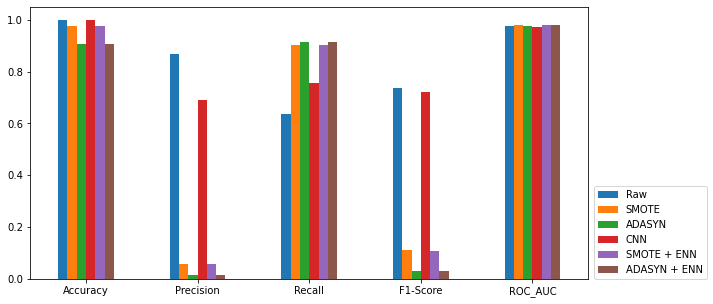

In [17]:
df_lr.plot(kind = 'bar', figsize = (10, 5))
plt.legend(loc=(1.01, 0.))
plt.xticks(rotation = 0)
plt.show()